# 聚类算法实现
created by Vulcan626 on 2023/12/12

In [122]:
# 导入包
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 导入数据集
加载预处理后的鸢尾花数据集，用于聚类实验

In [123]:
# 加载预处理后的数据集
dataset_path = 'iris/processed_iris.csv'
iris_df = pd.read_csv(dataset_path)
iris_df.head()



,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


## 聚类评估指标
定义用于评估聚类效果的指标

In [124]:
# 定义一个函数来计算轮廓系数，评估聚类效果
def calculate_silhouette_score(X, labels):
    return silhouette_score(X, labels)

## 可视化聚类效果
定义一个函数来可视化聚类效果

In [125]:
# 可视化聚类效果
def visualize_clusters(X, labels, algorithm_name):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.5)
    plt.title(f'Clusters visualized for {algorithm_name}')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.show()

## 划分式聚类
1. K-means
2. K-modes
3. K-means++
4. PAM

kmeans_silhouette:  0.45840087099074767


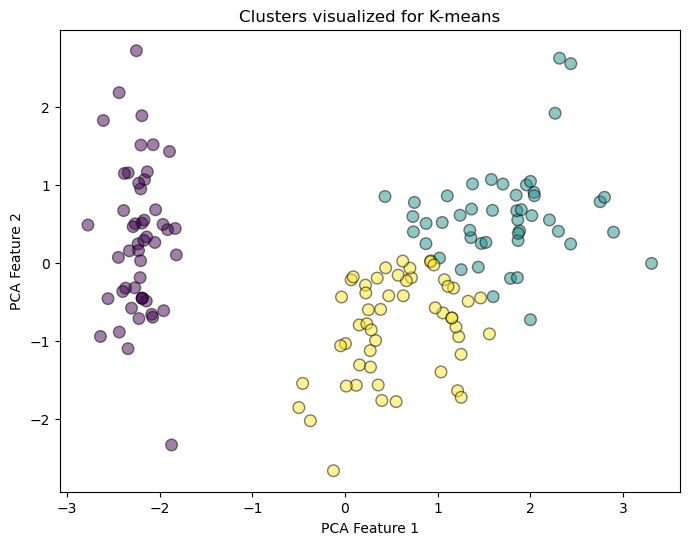

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 453.0
Run 1, iteration: 2/100, moves: 9, cost: 453.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 466.0
Run 2, iteration: 2/100, moves: 4, cost: 466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14, cost: 470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 11, cost: 468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 28, cost: 454.0
Run 7, iter

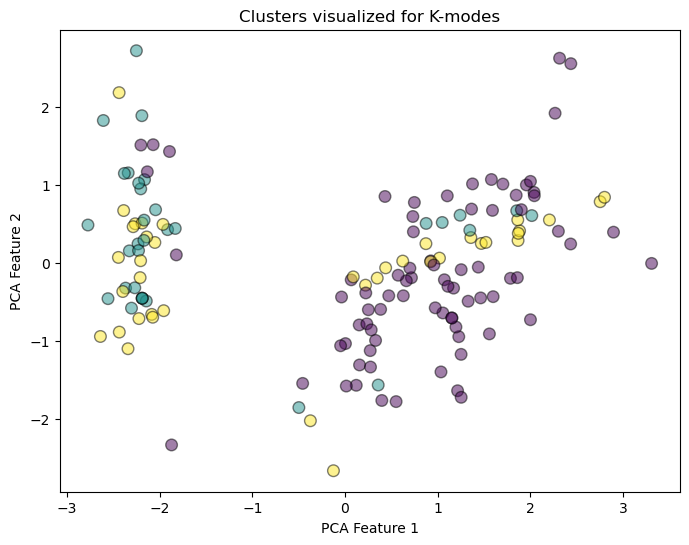

k_means_plus_silhouette:  0.4589717867018717


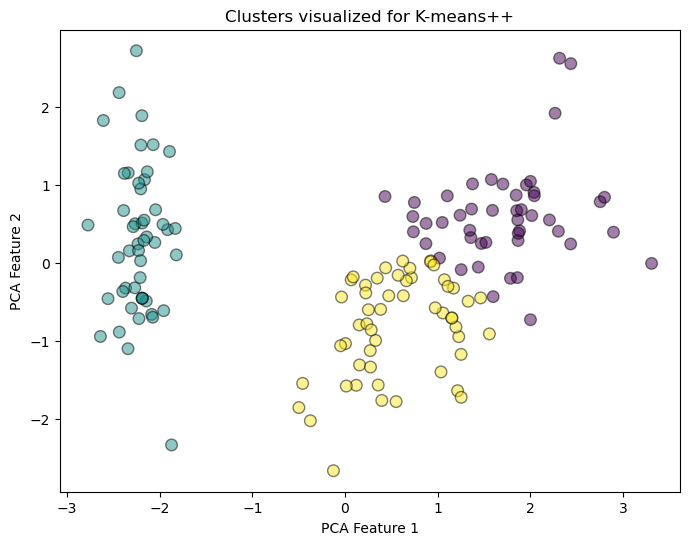

pam_silhouette:  0.4497202122514746


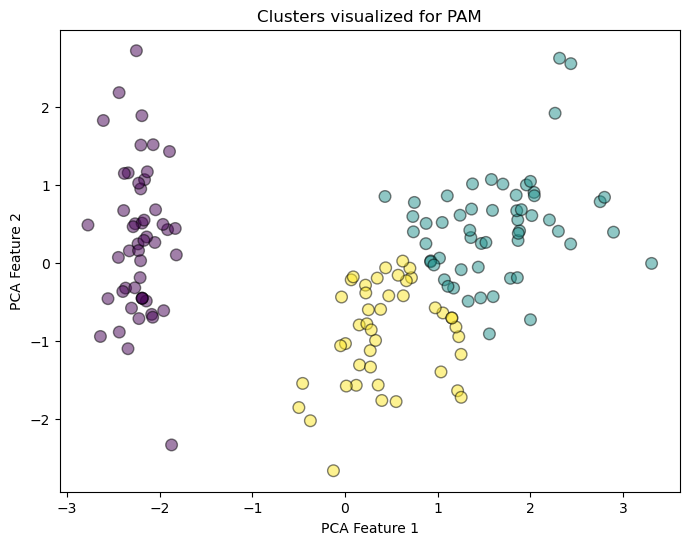

In [126]:
# 实现划分式聚类算法
# K-means
k_means = KMeans(n_clusters=3, n_init=10)
k_means_labels = k_means.fit_predict(iris_df.iloc[:, :-1])
# 计算轮廓系数
k_means_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], k_means_labels)
print('kmeans_silhouette: ', k_means_silhouette)
# 可视化不同聚类算法的效果
visualize_clusters(iris_df.iloc[:, :-1], kmeans_labels, "K-means")

# K-modes
k_modes = KModes(n_clusters=3, init='Huang', n_init=10, verbose=1)
k_modes_labels = k_modes.fit_predict(iris_df.iloc[:, :-1])
k_modes_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], k_modes_labels)
print('k_modes_silhouette: ', k_modes_silhouette)
visualize_clusters(iris_df.iloc[:, :-1], k_modes_labels, "K-modes")

# K-means++
k_means_plus = KMeans(n_clusters=3, init='k-means++', n_init=10)
k_means_plus_labels = k_means_plus.fit_predict(iris_df.iloc[:, :-1])
k_means_plus_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], k_means_plus_labels)
print('k_means_plus_silhouette: ', k_means_plus_silhouette)
visualize_clusters(iris_df.iloc[:, :-1], k_means_plus_labels, "K-means++")

# PAM
pam = KMedoids(n_clusters=3, metric='euclidean', init='k-medoids++', max_iter=300)
pam_labels = pam.fit_predict(iris_df.iloc[:, :-1])
pam_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], pam_labels)
print('pam_silhouette: ', pam_silhouette)
visualize_clusters(iris_df.iloc[:, :-1], pam_labels, "PAM")


## 层次式聚类
1. AGNES

agnes_silhouette:  0.44553956399200406


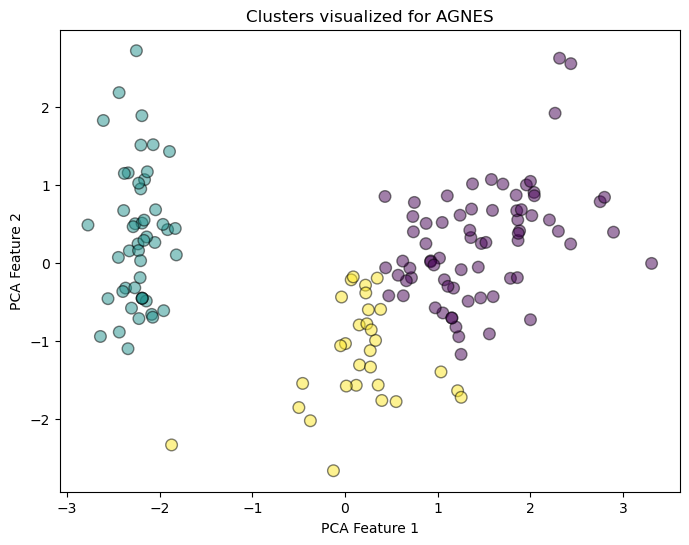

In [127]:
# AGNES
agnes = AgglomerativeClustering(n_clusters=3)
agnes_labels = agnes.fit_predict(iris_df.iloc[:, :-1])
agnes_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], agnes_labels)
print('agnes_silhouette: ', agnes_silhouette)
visualize_clusters(iris_df.iloc[:, :-1], agnes_labels, "AGNES")

## 密度式聚类
1. DBSCAN

dbscan_silhouette:  0.3491981656526392


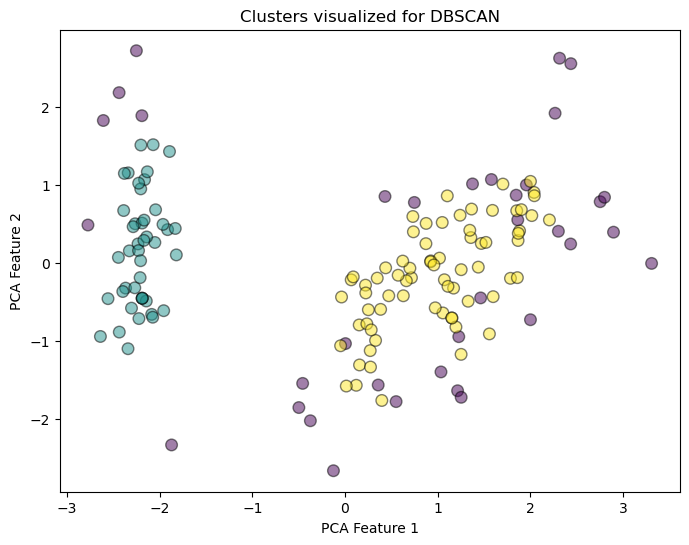

In [128]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(iris_df.iloc[:, :-1])
dbscan_silhouette = calculate_silhouette_score(iris_df.iloc[:, :-1], dbscan_labels)
print('dbscan_silhouette: ', dbscan_silhouette)
visualize_clusters(iris_df.iloc[:, :-1], dbscan_labels, "DBSCAN")